I am going to use the following metric functions
1. closeness
2. degree
3. betweenness

In [1]:
import preprocessing as ps
import numpy as np
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import random
random.seed(42)
import csv
import algos as al
import metrics as me

# random.seed(42)

In [2]:
# create the project networks
list_1 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T')]
list_2 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T'), ('DM', 'DB'), ('DM', 'AI'), ('DB', 'AI')]
list_3 = [('DM', 'T'), ('DB', 'T'), ('AI', 'DB')]

star_proj = ps.createProjectNetwork(list_1)
full_proj = ps.createProjectNetwork(list_2)
chain_proj = ps.createProjectNetwork(list_3)

main_network = pickle.load(open(f"./networks/new_subnets/5_nodes.pkl", 'rb'))
main_network = ps.add_weights(main_network.copy(), alpha=1, criterion='min')
main_network.remove_edges_from(nx.selfloop_edges(main_network))
project_net = chain_proj
beta = None

In [3]:
import time

obj_max_1 = 0.0
best_set_1 = set()

metric_fn = me.compute_closeness_centrality
network_main = main_network.copy()
print("Influential First")

influential_nodes = al.get_top_node_from_each_group(network_main.copy(), project_net, metric_fn)
start_time = time.time()
for node in influential_nodes:
    subset, comm_eff = al.Greedy(network_main.copy(), project_net, node, metric_fn=metric_fn, beta=beta)
    if comm_eff > obj_max_1:
        obj_max_1 = comm_eff
        best_set_1 = subset

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

total_inf = sum(al.leader_eff(network_main.copy(), project_net, metric_fn, node, beta=beta) for node in best_set_1)
print("Coordinators communication efficiency", total_inf)
# print(f"Objective value : {obj_max_1}")

print("Intra-team ranking")
for node in list(best_set_1):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.intra_team_rank(network_main, metric_fn, node)}")

print("\n")

print("Inter-team ranking")
for node in list(best_set_1):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.inter_team_rank(network_main, project_net, metric_fn, node)}")

Influential First
{'Hiroshi Nakagawa': 0.05384304751648944, 'Carlos Castillo': 0.05384304751648944, 'Markus Krötzsch': 0.035295155739874705, 'Kenji Yoshihira': 0.03750234389649353, 'Denny Vrandecic': 0.035295155739874705}
{'Rahul Jain': 0.06639004149377593, 'Ola Svensson': 0.1240694789081886, 'Pierre Fraigniaud': 0.14089468122578375, 'Yi Wu': 0.16820857863751051, 'Yury Makarychev': 0.15037593984962408}
{'Cameron Marlow': 0.051308363263211906, 'Babu Krishnaswamy': 0.12999675008124797, 'Yannis Velegrakis': 0.14311270125223616, 'Rizos Sakellariou': 0.12999675008124797, 'Baoqiu Cui': 0.11908306043465318}
{'Ricardo Bezerra de Andrade e Silva': 0.19540791402051785, 'Joseph Bockhorst': 0.19398642095053348, 'Avrim Blum': 0.34334763948497854, 'Robert C. Holte': 0.19890601690701143, 'Colin de la Higuera': 0.19656019656019655}
Execution time: 0.3698091506958008 seconds
Coordinators communication efficiency 194.47786667501478
Intra-team ranking
Team :DM, Node: Hiroshi Nakagawa, Rank: 1
Team :DB, N

1. Team :DB, Node: Witold Staniszkis, Rank: 1
2. Team :T, Node: Siddharth Suri, Rank: 6
3. Team :AI, Node: Robert H. Sloan, Rank: 2
4. Team :DM, Node: Bing Liu, Rank: 1

1. Team :T, Node: Siddharth Suri, Rank: 6
2. Team :DM, Node: Bing Liu, Rank: 1
3. Team :DB, Node: Witold Staniszkis, Rank: 1
4. Team :AI, Node: Robert H. Sloan, Rank: 1

In [ ]:
obj_max_2 = 0.0
best_set_2 = set()

metric_fn = me.compute_closeness_centrality
network_main = main_network.copy()
print("Greedy Algorithm")

start_time = time.time()
for node in network_main.nodes():
    subset, comm_eff = al.Greedy(network_main.copy(), project_net, node, metric_fn=metric_fn, beta=beta)
    if comm_eff > obj_max_2:
        obj_max_2 = comm_eff
        best_set_2 = subset

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

total_inf = sum(al.leader_eff(network_main.copy(), project_net, metric_fn, node, beta=beta) for node in best_set_2)
print("Coordinators communication efficiency", total_inf)
# print(f"Objective value : {obj_max_2}")

print("Intra-team ranking")
for node in list(best_set_2):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.intra_team_rank(network_main, metric_fn, node)}")

print("\n")

print("Inter-team ranking")
for node in list(best_set_2):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.inter_team_rank(network_main, project_net, metric_fn, node)}")

Greedy Algorithm
Execution time: 1.7459440231323242 seconds
Coordinators communication efficiency 194.47786667501478
Intra-team ranking
Team :DM, Node: Hiroshi Nakagawa, Rank: 1
Team :DB, Node: Yannis Velegrakis, Rank: 1
Team :AI, Node: Avrim Blum, Rank: 1
Team :T, Node: Yi Wu, Rank: 1


Inter-team ranking
Team :DM, Node: Hiroshi Nakagawa, Rank: 5
Team :DB, Node: Yannis Velegrakis, Rank: 4
Team :AI, Node: Avrim Blum, Rank: 1
Team :T, Node: Yi Wu, Rank: 1


In [ ]:
# Using Influence Team Strategy
metric_fn = me.compute_closeness_centrality
network_main = main_network.copy()
al.inteam_influence_only(network_main, project_net, metric_fn)

{'Hiroshi Nakagawa': 0.05384304751648944, 'Carlos Castillo': 0.05384304751648944, 'Markus Krötzsch': 0.035295155739874705, 'Kenji Yoshihira': 0.03750234389649353, 'Denny Vrandecic': 0.035295155739874705}
{'Rahul Jain': 0.06639004149377593, 'Ola Svensson': 0.1240694789081886, 'Pierre Fraigniaud': 0.14089468122578375, 'Yi Wu': 0.16820857863751051, 'Yury Makarychev': 0.15037593984962408}
{'Cameron Marlow': 0.051308363263211906, 'Babu Krishnaswamy': 0.12999675008124797, 'Yannis Velegrakis': 0.14311270125223616, 'Rizos Sakellariou': 0.12999675008124797, 'Baoqiu Cui': 0.11908306043465318}
{'Ricardo Bezerra de Andrade e Silva': 0.19540791402051785, 'Joseph Bockhorst': 0.19398642095053348, 'Avrim Blum': 0.34334763948497854, 'Robert C. Holte': 0.19890601690701143, 'Colin de la Higuera': 0.19656019656019655}
Intra-team ranking
Team :DB, Node: Yannis Velegrakis, Rank: 1
Team :DM, Node: Hiroshi Nakagawa, Rank: 1
Team :AI, Node: Avrim Blum, Rank: 1
Team :T, Node: Yi Wu, Rank: 1


Inter-team ranking

194.47786667501478

In [ ]:
# Using Random Strategy
num_iter = 1000
metric_fn = me.compute_closeness_centrality
network_main = main_network.copy()
al.randomMonteCarlo(network_main, project_net, metric_fn, num_iter)

164.43

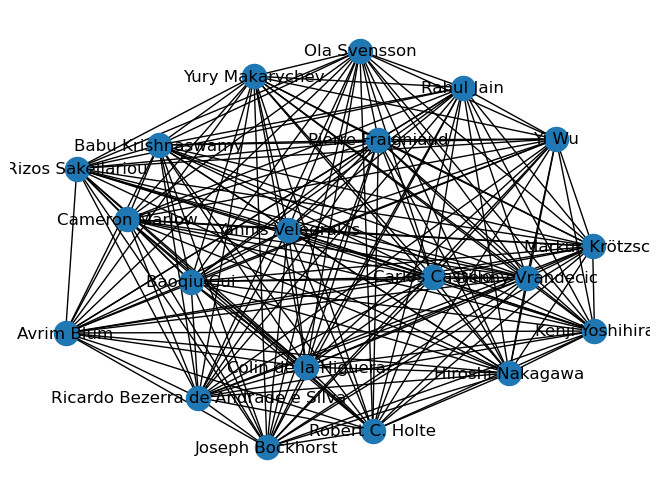

In [7]:
netty = ps.subgraph_by_same_label(network_main, "Hiroshi Nakagawa")
import networkx as nx
import matplotlib.pyplot as plt

# Plot the netty graph
nx.draw(network_main, with_labels=True)
plt.show()

In [8]:
network_main.nodes["Avrim Blum"]

{'label': 'AI'}

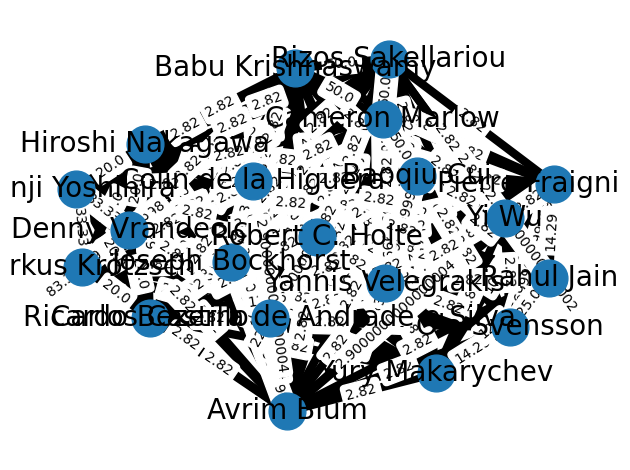

In [9]:
netty = network_main.copy()

elarge = [(u, v) for (u, v, d) in netty.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in netty.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(netty, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(netty, pos, node_size=700)

# edges
nx.draw_networkx_edges(netty, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    netty, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(netty, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(netty, "weight")
nx.draw_networkx_edge_labels(netty, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [10]:
netty.edges(data=True)

EdgeDataView([('Hiroshi Nakagawa', 'Kenji Yoshihira', {'weight': 20.0}), ('Hiroshi Nakagawa', 'Markus Krötzsch', {'weight': 20.0}), ('Hiroshi Nakagawa', 'Carlos Castillo', {'weight': 14.29}), ('Hiroshi Nakagawa', 'Denny Vrandecic', {'weight': 20.0}), ('Hiroshi Nakagawa', 'Babu Krishnaswamy', {'weight': 2.82}), ('Hiroshi Nakagawa', 'Pierre Fraigniaud', {'weight': 2.82}), ('Hiroshi Nakagawa', 'Yury Makarychev', {'weight': 2.82}), ('Hiroshi Nakagawa', 'Joseph Bockhorst', {'weight': 2.82}), ('Hiroshi Nakagawa', 'Ola Svensson', {'weight': 2.82}), ('Hiroshi Nakagawa', 'Robert C. Holte', {'weight': 2.82}), ('Hiroshi Nakagawa', 'Yannis Velegrakis', {'weight': 2.82}), ('Hiroshi Nakagawa', 'Rizos Sakellariou', {'weight': 2.82}), ('Hiroshi Nakagawa', 'Ricardo Bezerra de Andrade e Silva', {'weight': 2.82}), ('Hiroshi Nakagawa', 'Rahul Jain', {'weight': 2.82}), ('Hiroshi Nakagawa', 'Cameron Marlow', {'weight': 2.82}), ('Hiroshi Nakagawa', 'Avrim Blum', {'weight': 2.82}), ('Hiroshi Nakagawa', 'Colin